# ¿Qué vende un juego?

Este proyecto implica el análisis de datos de una tienda en línea llamada __ICE__ que vende videojuegos en todo el mundo. El objetivo principal es __identificar patrones que determinen el éxito de un juego__ y planificar campañas publicitarias en base a esos patrones. A continuación, se detallan los pasos para completar el proyecto:

__Paso 1: Estudio de la información general__

 - __Descargar el dataset__ desde la ruta especificada (/datasets/games.csv)
 - Examinar el dataset para comprender su __estructura y contenido__

__Paso 2: Preparación de datos__

 - Asegúrarse de que los datos estén en los __tipos de datos adecuados__
 - Tratar los __valores ausentes__ de manera apropiada
 - Gestionar los valores `TBD` de manera adecuada, ya que representa valores que __aún no han sido determinados__
 - Calcular las __ventas totales de cada juego__ y colócarlas en una columna separada

__Paso 3: Análisis de datos__

 - Analizar __cuántos juegos__ se lanzaron en diferentes años y determinar si los datos de cada período son significativos
 - Examinar cómo varían las __ventas entre plataformas__, identificando las plataformas con las __mayores ventas totales__
 - Investigar las __tendencias__ en la aparición y desaparición de plataformas populares y nuevas
 - Determinar el período de datos relevante para __construir un modelo para 2017__
 - Identificar las __plataformas líderes en ventas__, las que crecen y las que disminuyen 
 - Seleccionar las plataformas __potencialmente rentables__
 - Crear un __diagrama de caja__ para las ventas globales de todos los juegos, desglosados por plataforma
 - Examinar la __correlación entre las reseñas__ de usuarios y críticos __y las ventas__ en una plataforma popular
 - __Comparar las ventas__ de los mismos juegos en otras plataformas
 - Analizar la __distribución general__ de los juegos por género y las tendencias en __géneros más rentables__

__Paso 4: Prueba de hipótesis__

 - Probar las siguientes hipótesis: 
  - a) Las calificaciones promedio de los usuarios para las plataformas __Xbox One__ y __PC__ son las mismas
  - b) Las calificaciones promedio de los usuarios para los géneros de __Acción__ y __Deportes__ son diferentes
 - Establecer un valor de umbral __alfa__ y explicar la formulación de las hipótesis, el criterio utilizado para probarlas y los resultados obtenidos

__Paso 5: Perfil de usuario por región__

 - Para cada región (NA, EU, JP), identificar __las cinco plataformas principales__ y describir las variaciones en sus cuotas de mercado
 - Identificar __los cinco géneros principales__ en cada región y explicar las diferencias
 - Examinar si las __clasificaciones de ESRB__ afectan las ventas en regiones individuales

__Paso 6: Conclusión general__

 - Resumir los __hallazgos y conclusiones generales__ basadas en el análisis de datos y las pruebas de hipótesis
 - Presentar los resultados de manera __clara y concisa__

# Descripción de los datos

- `Name` __Nombre__ del juego
- `Platform` __Plataforma__
- `Year_of_Release` __Año de lanzamiento__ del juego
- `Genre` __Género__ del juego
- `NA_sales` Ventas en __Norteamérica__ en millones de USD
- `EU_sales` Ventas en __Europa__ en millones de USD
- `JP_sales` Ventas en __Japón__ en millones de USD
- `Other_sales` Ventas en __otros países__ en millones de USD
- `Critic_Score` máximo de __100__
- `User_Score` máximo de __10__
- `Clasificación` __ESRB__

## Estudio de la información general

In [1]:
# cargar librerías

import re
import calendar
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# cargar los datos

data_original = pd.read_csv("./games.csv")

In [3]:
# crear una copia de DataFrame

data = data_original.copy()

In [4]:
# mostrar el numero de las filas y las columnas en el DataFrame

data.shape

(16715, 11)

In [5]:
# imprimir las informaciones sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# imprimir una muestra de las primeras filas del DataFrame

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


__Evaluación:__

- Hay __16715__ filas y __11__ columnas en el DataFrame
- Se encuentran __valores ausentes__ en algunas de las columnas
- Los __nombres de las columnas__ tendrían que ser en minúsculas para facilitar el manejo de los datos
- Tendríamos que convertir los valores en `Year_of_Release` a __datetime__

## Preparación de datos

In [7]:
# cambiar los nombres de las columnas a minúsculas para facilitar el manejo de los datos

data.columns = data.columns.str.lower()

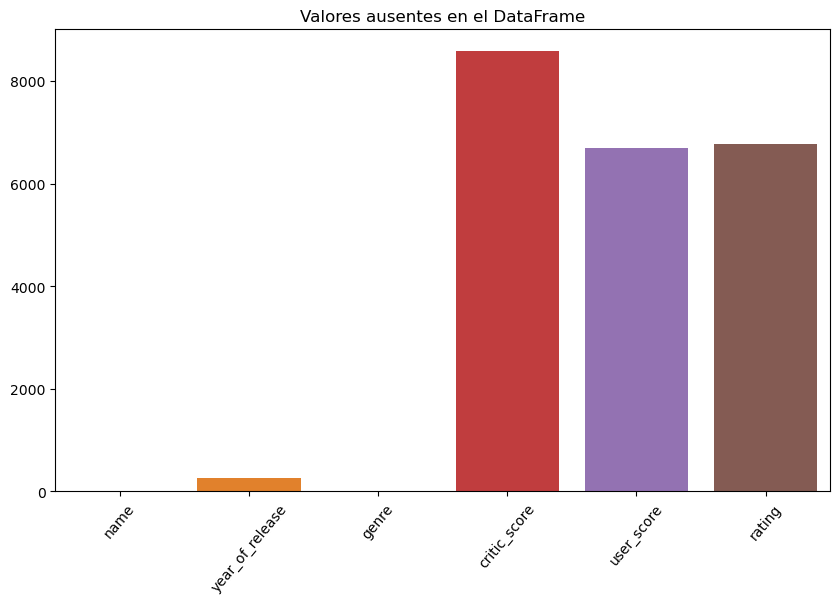

In [8]:
# mostrar el numero de valores ausentes por cada columna en el DataFrame

missing_values_count = data.isnull().sum()

plt.figure(figsize=(10, 6))
missing_columns = missing_values_count[missing_values_count > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

In [9]:
# mostrar el porcentaje de los valores ausentes en el DataFrame y en cada columna

total_missing = data.isnull().sum().sum()
total_cells = data.size

missing_percentage_total = (total_missing / total_cells) * 100
missing_values_count = data.isnull().sum()
total_rows = len(data)
missing_percentage = (missing_values_count / total_rows) * 100

print(f"Porcentaje total de valores ausentes en el DataFrame: {missing_percentage_total:.2f}%")
print()
print("Porcentaje de valores ausentes por columna:")
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{column}: {int(percentage)}%")

Porcentaje total de valores ausentes en el DataFrame: 12.14%

Porcentaje de valores ausentes por columna:
name: 0%
year_of_release: 1%
genre: 0%
critic_score: 51%
user_score: 40%
rating: 40%


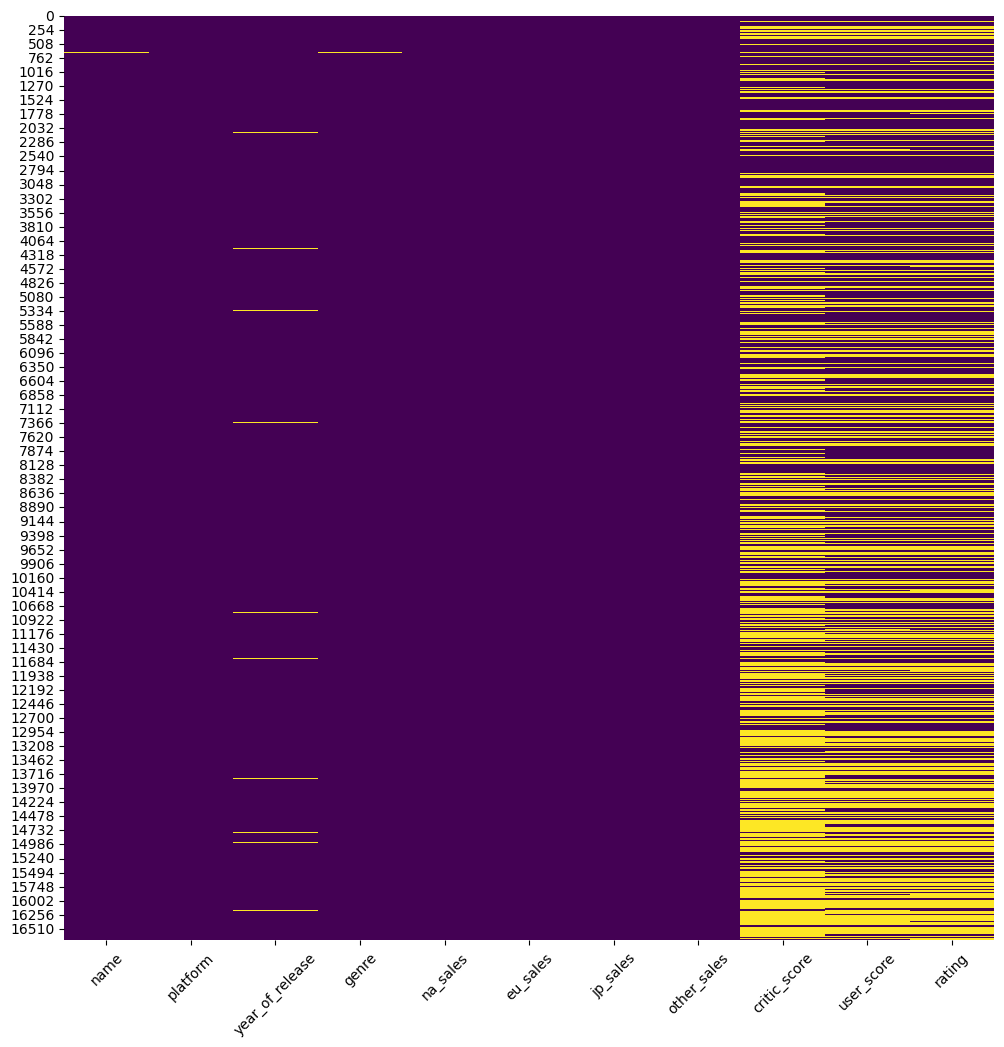

In [10]:
# mostrar la distribución de los valores ausentes en el DataFrame

plt.figure(figsize=(12, 12))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45)
plt.show()

__Evaluación:__

- El porcentaje total de __valores ausentes__ en el DataFrame es del __12.14%__
- Las columnas con el porcentaje de __valores ausentes__ más alto son: `critic_score` __51%__, `user_score` __40%__ y `rating` __40%__
- Vamos a intentar una __imputación__ de los valores ausentes en el DataFrame
- Algunos juegos tienen la información sobre el __año de lanzamiento__ en el nombre
- Algunos juego con valores ausentes en `year_of_release` también se vendieron en __otra plataformas__
- Vamos a imputar los valores ausentes `critic_rating` y `user_rating` 
- Podriamos utilizar el __promedio__ de la __punctuación__ de los juegos con __ventas similares__
- Supuestamente juegos con el __mismo exito__ tendrán punctuaciones similares

In [11]:
# mostrar cuantos valores ausentes se encuentran en `year_of_release`

data['year_of_release'].isna().sum()

269

In [12]:
# imprimir una muestra de los valores ausentes en `year_of_release`

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# definir una funcion para imputar el año de lanzamiento analizando el nombre del juego

def extract_year(row):
    if pd.isna(row['name']):
      return row.year_of_release
    res = re.search(r'\b\d{4}\b', row['name'])
    if pd.isna(row.year_of_release) and res:
        row.year_of_release = int(res.group())
    return row.year_of_release

data['year_of_release'] = data.apply(extract_year, axis=1)

In [14]:
# mostrar cuantos valores ausentes se encuentran ahora en `year_of_release`

data['year_of_release'].isna().sum()

252

In [15]:
# seleccionar las filas en las que el valor en la columna `name` sea igual a 'LEGO Batman: The Videogame'

data[data['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [16]:
# definir una funcion para imputar el año de lanzamiento del mismo juego en otra plataforma

def fill_missing_years(row):
    if pd.isna(row['year_of_release']):
        same_game = data[(data['name'] == row['name']) & (data['year_of_release'].notna())]
        if not same_game.empty:
            return same_game.iloc[0]['year_of_release']
    return row['year_of_release']

data['year_of_release'] = data.apply(fill_missing_years, axis=1)

In [17]:
# mostrar cuantos valores ausentes se encuentran ahora en `year_of_release`

data['year_of_release'].isna().sum()

139

In [18]:
# calcular las ventas totales de cada juego y colocarlas en una nueva columna

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


__Evaluación:__

- __Imputamos__ algunos de los valores en `Year_of_Release`
- Calculamos las __ventas totales__ por cada juego y agregamos los valores al DataFrame
- Vamos a __convertir__ los valores 'tbd' a 'NaN'
- Esto nos permitirá de convertir los valores en `Year_of_Release` a __datetime__

In [19]:
# crear una versión del DataFrame sin los valores ausentes en `year_of_release`

data_clean = data.dropna(subset=['year_of_release']).copy()

data_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [20]:
# cambiar los valores en la columna `year_of_release` en datetime

data_clean['year_of_release'] = pd.to_datetime(data_clean['year_of_release'], format='%Y', errors='coerce')
print('2   call_date    16576 non-null    ',data['year_of_release'].dtypes)

2   call_date    16576 non-null     float64


In [21]:
# identificar las columnas que contienen valores 'tbd'

data_clean.columns[data_clean.isin(['tbd']).any()]

Index(['user_score'], dtype='object')

In [22]:
# contar cuántos valores 'tbd' hay en la columna `user_score`

data_clean['user_score'].eq('tbd').sum()

2395

In [23]:
# reemplazar los valores 'tbd' con NaN utilizando NumPy

data_clean.loc[data_clean['user_score'] == 'tbd', 'user_score'] = np.nan
data_clean['user_score'] = data_clean['user_score'].astype(float)

data_clean['user_score'].eq('tbd').sum()

0

In [24]:
# calcular los valores ausentes en `critic_score`

data_clean['critic_score'].isnull().sum()

8497

In [25]:
# imputar los valores ausentes en `critic_score` utilizando juegos similares en términos de ventas

juegos_sin_puntuacion = data_clean[data_clean['critic_score'].isnull()]

for index, juego in juegos_sin_puntuacion.iterrows():
    juegos_similares = data_clean[(data_clean['total_sales'] >= juego['total_sales'] * 0.9) &
                            (data_clean['total_sales'] <= juego['total_sales'] * 1.1)]
    media_critic_similares = juegos_similares['critic_score'].mean()
    data_clean.loc[index, 'critic_score'] = media_critic_similares

In [26]:
# mostrar el resultado de la imputación

data_clean['critic_score'].isnull().sum()

5

In [27]:
# calcular los valores ausentes en `user_score`

data_clean['user_score'].isnull().sum()

9033

In [28]:
# Imputar los valores ausentes en `user_score` utilizando juegos similares en términos de ventas

juegos_sin_user_score = data_clean[data_clean['user_score'].isnull()]

for index, juego in juegos_sin_user_score.iterrows():
    juegos_similares = data_clean[(data_clean['total_sales'] >= juego['total_sales'] * 0.9) &
                            (data_clean['total_sales'] <= juego['total_sales'] * 1.1)]
    media_user_similares = juegos_similares['user_score'].mean()
    data_clean.loc[index, 'user_score'] = media_user_similares

In [29]:
# mostrar el resultado de la imputación

data_clean['user_score'].isnull().sum()

5

In [30]:
# selecciónar los valores de punctuación faltantes para averigüar si tienen una distribución simetrica

data_clean[data_clean['critic_score'].isnull() & data_clean['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
20,Pokemon Diamond/Pokemon Pearl,DS,2006-01-01,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989-01-01,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
16676,G1 Jockey 4 2008,PS3,2008-01-01,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


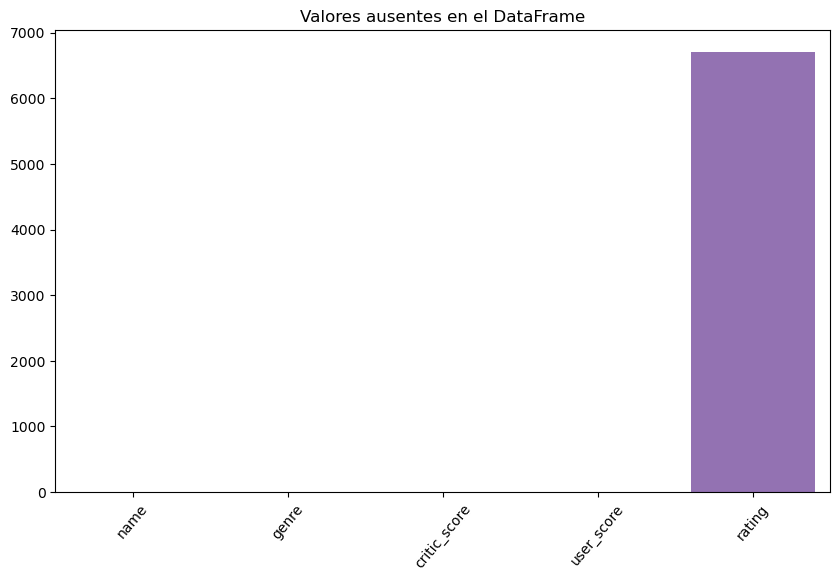

In [31]:
# mostrar el numero de valores ausentes por cada columna en el DataFrame

missing_values_count = data_clean.isnull().sum()

plt.figure(figsize=(10, 6))
missing_columns = missing_values_count[missing_values_count > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

La clasificación de la __ESRB__ consta de diferentes categorías, cada una indicando el nivel de contenido que puede incluir un juego. 

__Las categorías son las siguientes:__

- __EC__ (Early Childhood): Apropiado para niños de edad preescolar y más jóvenes
- __E__ (Everyone): Apropiado para todas las edades
- __E10+__ (Everyone 10 and older): Apropiado para personas de 10 años en adelante
- __T__ (Teen): Apropiado para adolescentes
- __M__ (Mature): Apropiado para personas de 17 años en adelante. Puede contener contenido más intenso
- __AO__ (Adults Only): Solo para adultos. Puede incluir contenido sexual explícito o violencia extrema
- __RP__ (Rating Pending): La clasificación está pendiente y aún no ha sido asignada

Vamos a imputar los __valores ausentes__ en la columna `rating` con 'RP'

In [32]:
# imputar los valores ausentes en `rating` con 'RP'

data_clean['rating'].fillna('RP', inplace=True)
data_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,78.500000,7.875000,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,64.978992,6.801449,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,64.978992,6.801449,RP,0.01


In [33]:
# mostrar los valores ausentes que quedan en el DataFrame `data_clean`

data_clean.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       5
user_score         5
rating             0
total_sales        0
dtype: int64

In [34]:
# quitar los valores ausentes en el DataFrame `data_clean`

data_clean.dropna(inplace=True)

In [35]:
# imprimir la información general sobre el DataFrame actualizado

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16569 non-null  object        
 1   platform         16569 non-null  object        
 2   year_of_release  16569 non-null  datetime64[ns]
 3   genre            16569 non-null  object        
 4   na_sales         16569 non-null  float64       
 5   eu_sales         16569 non-null  float64       
 6   jp_sales         16569 non-null  float64       
 7   other_sales      16569 non-null  float64       
 8   critic_score     16569 non-null  float64       
 9   user_score       16569 non-null  float64       
 10  rating           16569 non-null  object        
 11  total_sales      16569 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


In [36]:
# calcular el porcentaje de datos que vamos a utilizar por nuestro análisis comparado al tamaño original del conjunto

porcentaje_entradas = (len(data_clean) / len(data)) * 100
print(f'El porcentaje de entradas en `data_clean`es el {porcentaje_entradas:.2f}% de los datos originales')

El porcentaje de entradas en `data_clean`es el 99.13% de los datos originales


__Evaliuación:__

- __Imputamos__ los valores ausentes en `critic_score` y `user_score` comparando las __ventas totales__
- __Imputamos__ los valores ausentes en `rating` con '__RP__'
- Vamos a trabajar con el __99.13%__ de los datos originales por nuestro análisis

# Análisis de datos

## ¿Cuántos juegos fueron lanzados en diferentes años?

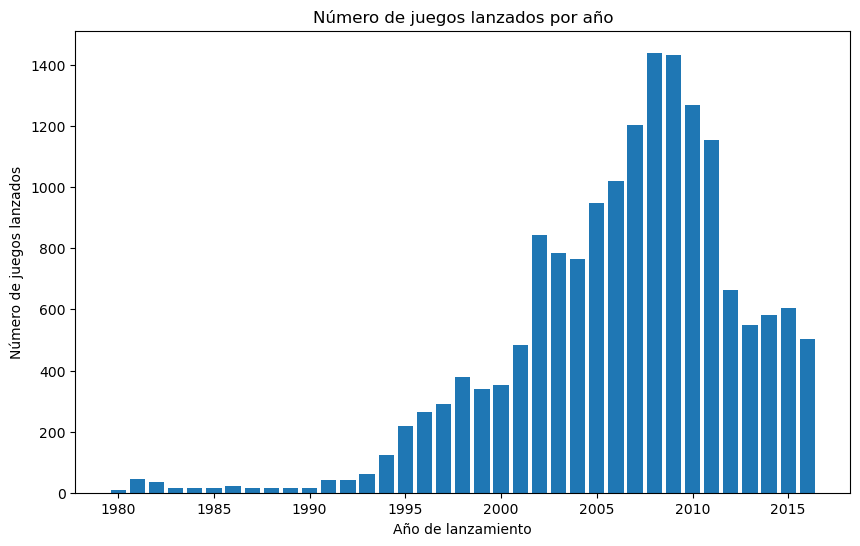

In [37]:
# trazar un gráfico de barras para mostrar cuántos juegos se lanzaron en diferentes años

games_by_year = data.groupby('year_of_release')['name'].count()

plt.figure(figsize=(10, 6))
plt.bar(games_by_year.index, games_by_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos lanzados')
plt.title('Número de juegos lanzados por año')
plt.show()

__Evaluación:__

El mercado de los videojuegos ha experimentado un __crecimiento significativo__ a lo largo de las décadas. Desde sus inicios en las décadas de 1970 y 1980, los videojuegos han __evolucionado__ desde simples juegos de arcade hasta __complejas experiencias de entretenimiento__ en línea y en consolas de última generación. A medida que __la tecnología ha avanzado__, los gráficos, la jugabilidad y la narrativa de los videojuegos se han vuelto cada vez más sofisticados, __atrayendo a una audiencia más amplia y diversa__. Además, la industria de los videojuegos ahora abarca una __amplia gama de plataformas__, incluyendo consolas, PC y dispositivos móviles, lo que ha contribuido aún más a su popularidad y éxito.

## ¿Cómo varían las ventas de una plataforma a otra?

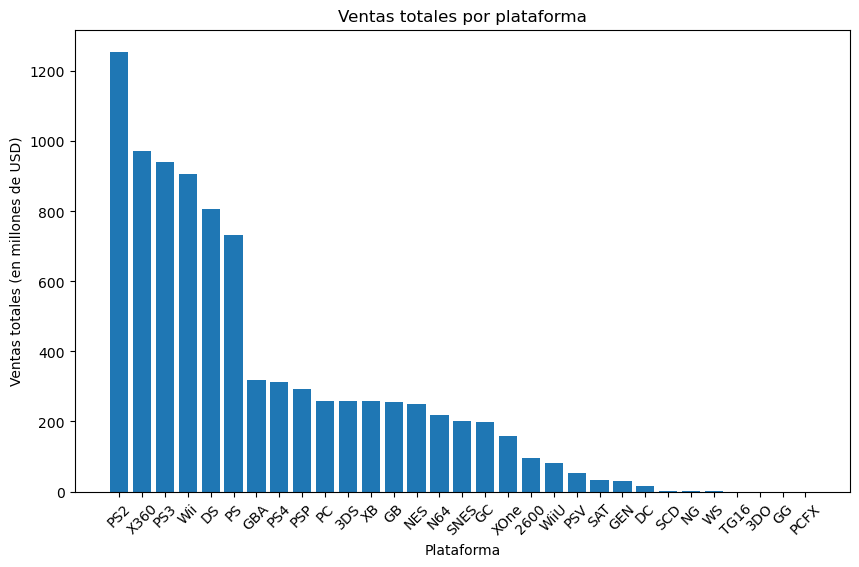

In [38]:
# trazar un gráfico de barras para mostrar cómo varían las ventas entre plataformas

platform_sales = data.groupby('platform')['total_sales'].sum()
platform_sales_sorted = platform_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(platform_sales_sorted.index, platform_sales_sorted.values)
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones de USD)')
plt.title('Ventas totales por plataforma')
plt.xticks(rotation=45)
plt.show()

## ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

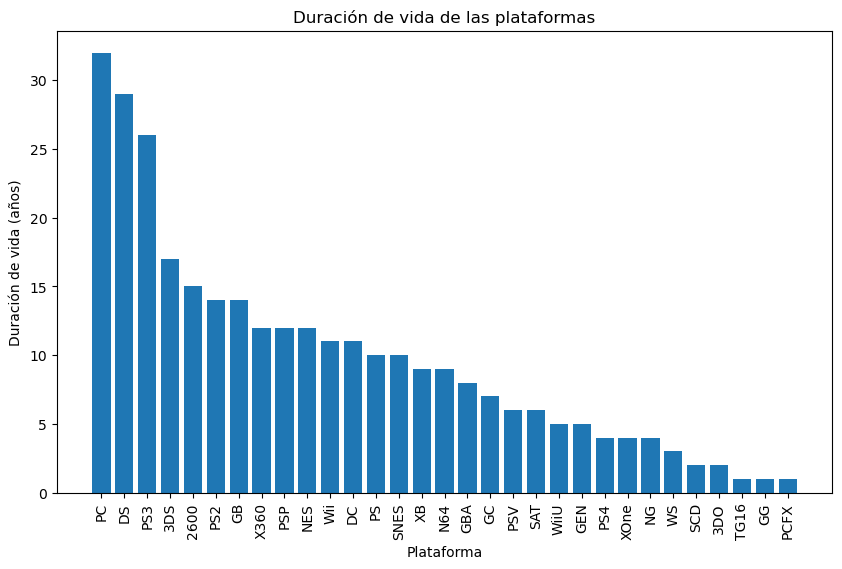

In [39]:
# trazar un gráfico de barras para mostrar las tendencias en la aparición y desaparición de las plataformas

platform_lifespan = {}

for platform in platform_sales_sorted.index:
    platform_data = data_clean[data_clean['platform'] == platform]
    start_year = platform_data['year_of_release'].min().year  
    end_year = platform_data['year_of_release'].max().year  
    platform_lifespan[platform] = end_year - start_year + 1

sorted_platform_lifespan = dict(sorted(platform_lifespan.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_platform_lifespan.keys(), sorted_platform_lifespan.values())
plt.xlabel('Plataforma')
plt.ylabel('Duración de vida (años)')
plt.title('Duración de vida de las plataformas')
plt.xticks(rotation=90)
plt.show()

__Evaluación:__

En la industria de los videojuegos, es común ver que las plataformas que logran un __mayor éxito__ suelen tener una __duración de vida más prolongada__. Esto se debe a varias razones:

__Adopción y Base de Usuarios:__
- Las plataformas exitosas suelen atraer a una __gran base de usuarios__
- Esto genera __interés continuo__ en el desarrollo y la adquisición de juegos

__Soporte de Desarrolladores:__ 
- Los desarrolladores tienden a __enfocar sus esfuerzos__ en las plataformas con __más usuarios__
- Esto también __prolonga la vida__ útil de la plataforma

__Ciclo de Vida Planificado:__ 
- Las compañías de consolas suelen planificar el __ciclo de vida__ de sus productos con el objetivo de mantener la relevancia en el mercado
- Esto puede incluir la introducción de __versiones mejoradas__ o la compatibilidad con __versiones anteriores__

__Librería de Juegos Establecida:__ 
- A medida que pasa el tiempo, las plataformas exitosas acumulan una __amplia biblioteca de juegos__
- Esto atrae a __nuevos usuarios__ y mantiene a los existentes comprometidos

__Innovación Tecnológica:__ 
- A medida que la tecnología avanza, las plataformas exitosas pueden __actualizarse o evolucionar__
- De esta forma pueden aprovechar de las __nuevas capacidades__ y tendencias del mercado

__Comunidad Activa:__ 
- Las plataformas populares a menudo tienen una __comunidad activa__ de jugadores
- Esto fomenta la __interacción social__ y el __intercambio de experiencias__

Por lo tanto, existe una __correlación positiva__ entre el éxito de una plataforma y su duración de vida. Sin embargo, también es importante destacar que factores como la competencia, los cambios en la tecnología y las tendencias del mercado pueden influir en la __longevidad de una plataforma__.

## Tendecias de ventas globales

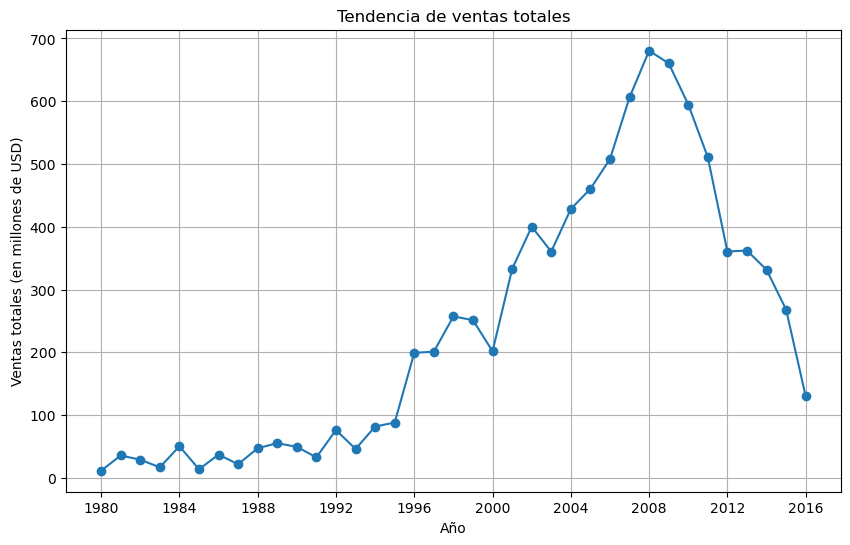

In [40]:
# trazar un gráfico para mostrar la tendecia de ventas totales

total_sales_trend = data_clean.groupby('year_of_release')['total_sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_sales_trend.index, total_sales_trend.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Ventas totales (en millones de USD)')
plt.title('Tendencia de ventas totales')
plt.grid(True)
plt.show()

## Datos relevantes, construir un modelo para 2017

In [41]:
# filtrar los datos para incluir solo el período relevante y generar un modelo por el 2017

data_clean['year_of_release'] = pd.to_datetime(data_clean['year_of_release'], format='%Y', errors='coerce')

start_date = np.datetime64('2012-01-01')
end_date = np.datetime64('2016-12-31')

data_for_model = data_clean[(data_clean['year_of_release'] >= start_date) & (data_clean['year_of_release'] <= end_date)]

data_for_model

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,87.412698,5.858889,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,87.412698,5.858889,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,64.978992,6.801449,RP,0.01


__Evaluación:__

Seleccionando los datos entre el __2012__ y el __2016__ nos aseguramos que niuestro análisis sea actuálizado a las __ultimas tendencias__

## Las plataformas más populares

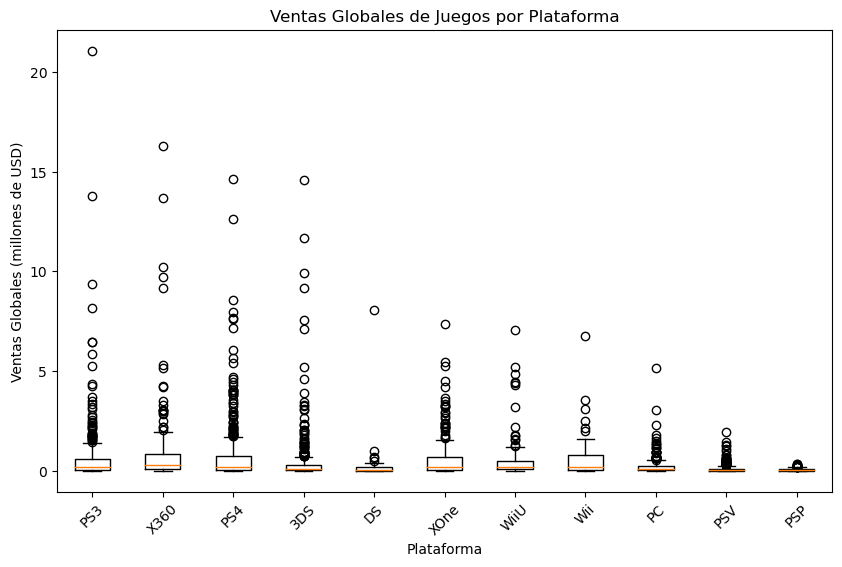

In [42]:
# crear un diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma

sales_data = data_for_model[['platform', 'total_sales']]

plt.figure(figsize=(10, 6))
plt.boxplot([sales_data[sales_data['platform'] == platform]['total_sales'].dropna() 

for platform in sales_data['platform'].unique()], labels=sales_data['platform'].unique())

plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de USD)')
plt.title('Ventas Globales de Juegos por Plataforma')
plt.xticks(rotation=45)
plt.show()

## Los generos más populares 

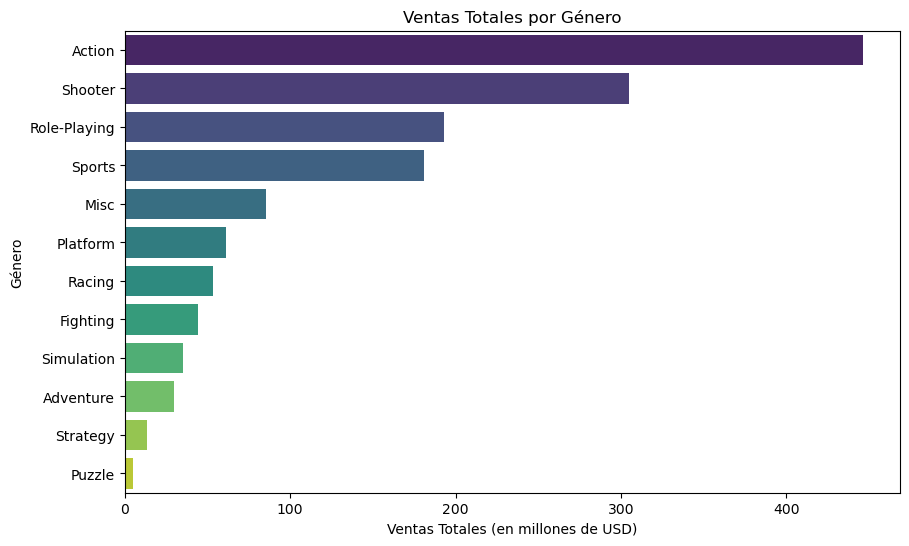

In [43]:
# trazar un gráfico de barras para mostrar las ventas por géneros más populares

genre_sales = data_for_model.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.xlabel('Ventas Totales (en millones de USD)')
plt.ylabel('Género')
plt.title('Ventas Totales por Género')
plt.show()

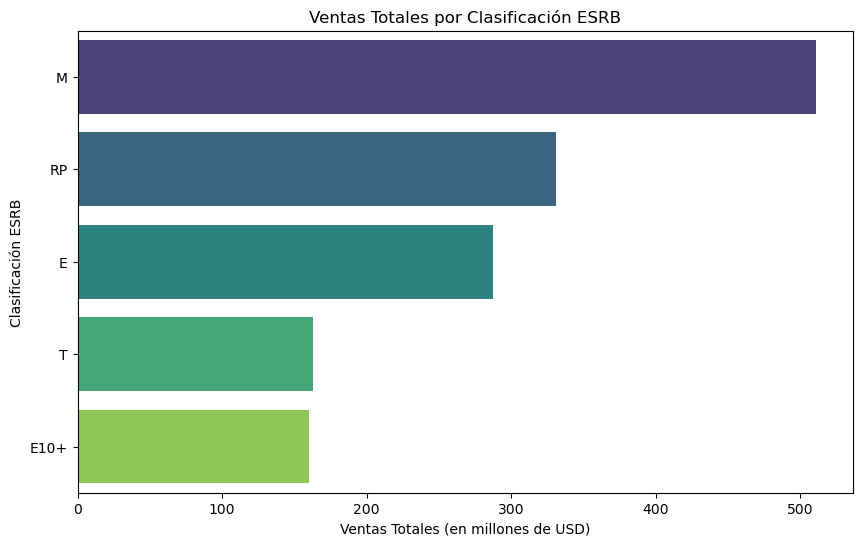

In [44]:
# trazar un gráfico de barras para mostrar la relación entre las ventas y las clasificaciones ESRB

esrb_sales = data_for_model.groupby('rating')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_sales.values, y=esrb_sales.index, palette='viridis')
plt.xlabel('Ventas Totales (en millones de USD)')
plt.ylabel('Clasificación ESRB')
plt.title('Ventas Totales por Clasificación ESRB')
plt.show()

## Comparación de las ventas de los mismos juegos en diferente plataformas

In [45]:
# seleccionar los juegos multiplataforma

plataformas_por_juego = data_for_model.groupby('name')['platform'].nunique()
juegos_multiplataforma = plataformas_por_juego[plataformas_por_juego > 4]
juegos_multiplataforma_lista = juegos_multiplataforma.index.tolist()
data_juegos_multiplataforma = data_for_model[data_for_model['name'].isin(juegos_multiplataforma_lista)]

data_juegos_multiplataforma

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,87.412698,5.858889,RP,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62
60,Call of Duty: Ghosts,X360,2013-01-01,Shooter,6.73,2.56,0.04,0.91,73.000000,2.600000,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,Turbo: Super Stunt Squad,X360,2013-01-01,Sports,0.00,0.01,0.00,0.00,64.978992,4.500000,E,0.01
16491,Ride,X360,2015-01-01,Racing,0.00,0.01,0.00,0.00,64.978992,6.801449,RP,0.01
16518,Rugby World Cup 2015,PC,2015-01-01,Sports,0.00,0.01,0.00,0.00,64.978992,1.400000,E,0.01
16631,The Amazing Spider-Man 2 (2014),PC,2014-01-01,Action,0.00,0.01,0.00,0.00,64.978992,6.801449,RP,0.01


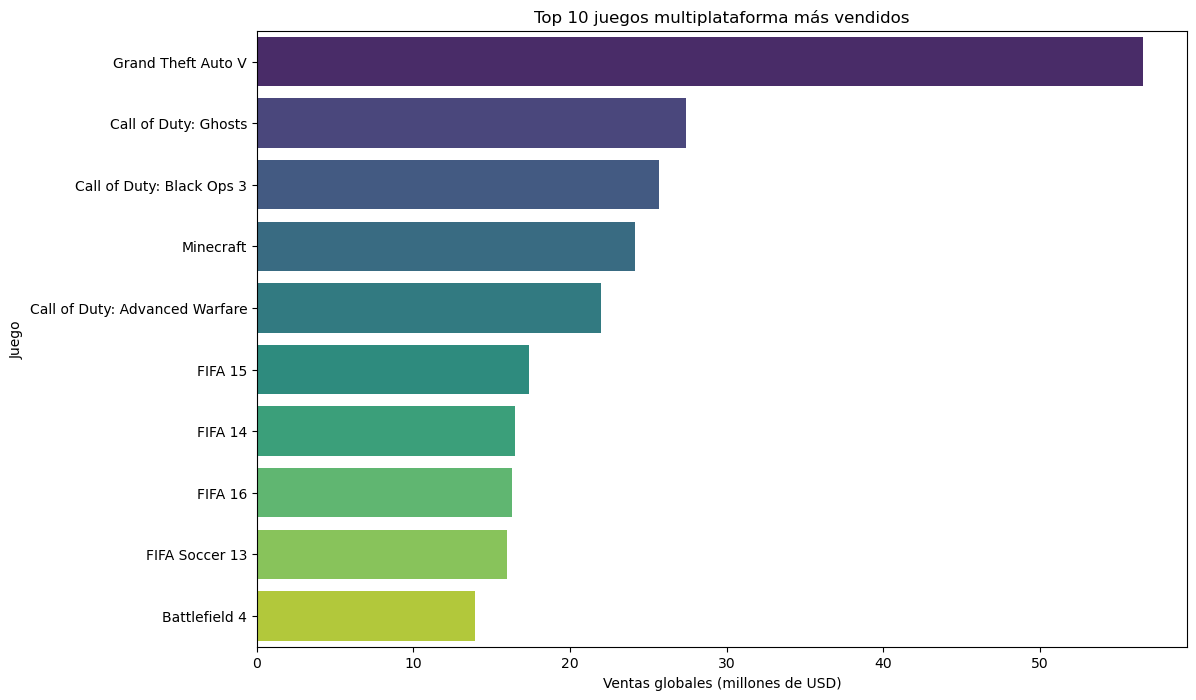

In [46]:
# Seleccionar los 10 juegos multiplataforma con más ventas

ventas_por_juego = data_juegos_multiplataforma.groupby('name')['total_sales'].sum().reset_index()
top_10_juegos = ventas_por_juego.sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='name', data=top_10_juegos, palette='viridis')
plt.xlabel('Ventas globales (millones de USD)')
plt.ylabel('Juego')
plt.title('Top 10 juegos multiplataforma más vendidos')
plt.show()

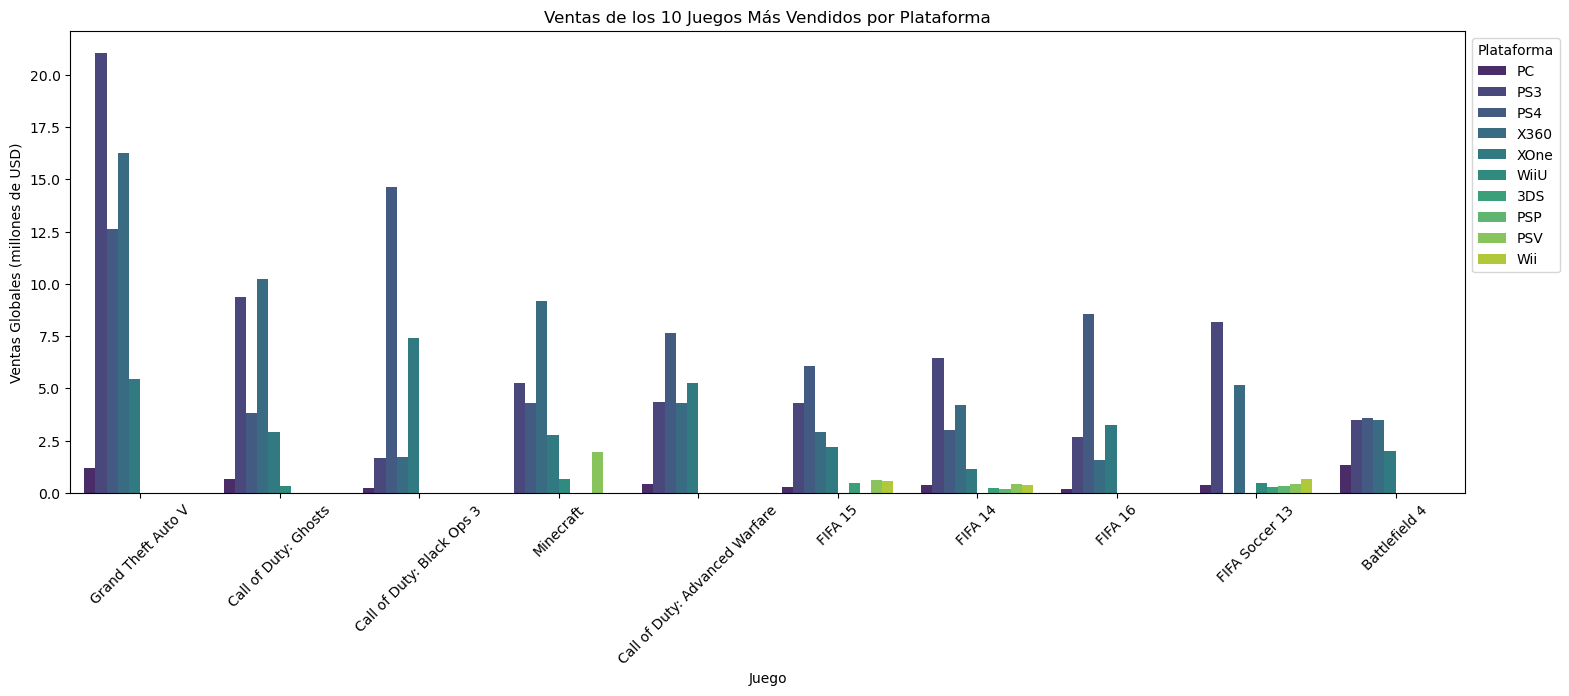

In [47]:
# mostrar las ventas en las diferentes plataforma de los juegos multiplataforma más populares

top_10_data = data_juegos_multiplataforma[data_juegos_multiplataforma['name'].isin(top_10_juegos['name'])]
ventas_por_juego_y_plataforma = top_10_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x='name', y='total_sales', hue='platform', data=ventas_por_juego_y_plataforma, palette='viridis',
            order=top_10_juegos['name'])
plt.xlabel('Juego')
plt.ylabel('Ventas Globales (millones de USD)')
plt.title('Ventas de los 10 Juegos Más Vendidos por Plataforma')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

__Evaluación:__

Aunque un juego puede ser __multiplataforma__, su éxito puede variar según la plataforma. Esto puede deberse a varias razones, como diferencias en la __base de usuarios__ de cada plataforma, preferencias de los jugadores, características específicas de la plataforma, __marketing y promoción__, entre otros factores. Por lo tanto, es importante analizar las ventas y el rendimiento de un juego en cada plataforma individualmente para comprender completamente su __impacto y éxito en el mercado__.

## Tendencias de ventas por diferentes regiones

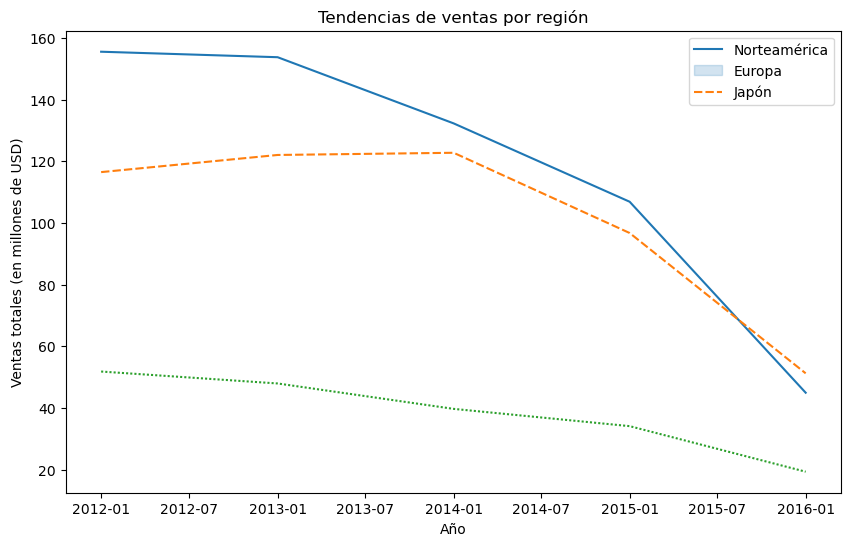

In [48]:
# trazar un gráfico de líneas para mostrar las tendencias de ventas regionales

region_sales = data_for_model[['na_sales', 'eu_sales', 'jp_sales']].groupby(data_for_model['year_of_release']).sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_sales)
plt.xlabel('Año')
plt.ylabel('Ventas totales (en millones de USD)')
plt.title('Tendencias de ventas por región')
plt.legend(['Norteamérica', 'Europa', 'Japón'])
plt.show()

__Evaluación:__

Durante los últimos años, la industria de los videojuegos ha experimentado __cambios significativos__ y dinámicos en varios aspectos. Algunas de las tendencias y eventos que han contribuido a esta evolución incluyen:

__Transición Generacional de Consolas:__ 
- La introducción de __nuevas generaciones__ de consolas, como la PlayStation 5 y la Xbox Series X/S
- Estas nuevas plataformas han generado un __período de transición__ que puede afectar las ventas y la disponibilidad de juegos

__Crecimiento de Plataformas Digitales:__ 
- El aumento de las plataformas de distribución de __juegos en línea__
- __Steam__, __Epic Games Store__ y las tiendas propias de las consolas
- Estos __nuevos canales de distribución__ han cambiado la forma en que los consumidores adquieren y juegan videojuegos

__Pandemia de COVID-19:__ 
- La pandemia ha tenido un __impacto__ tanto positivo como negativo en la industria
- Por un lado, ha __aumentado la demanda__ de videojuegos debido a más personas quedándose en casa
- Por otro lado, también ha presentado __desafíos logísticos y de producción__

__Crecimiento del Mercado Móvil:__ 
- Los __juegos móviles__ continúan creciendo en popularidad y generando importantes ingresos
- Esto ha llevado a una __mayor competencia__ en el mercado

__Tendencias en los Modelos de Negocio:__ 
- La popularidad de los __juegos gratuitos__ con opciones de monetización en el juego
- Las __microtransacciones__ y compras dentro de la aplicación han cambiado la forma en que se generan ingresos en la industria

__Competencia y Diversificación de Contenido:__
- La competencia entre los desarrolladores y editores ha llevado a una __mayor diversificación__
- Esto brinda a los jugadores una __amplia variedad de opciones__

__Nuevas Tecnologías y Plataformas:__ 
- El avance de la __tecnología__, incluyendo la __realidad virtual__, __la realidad aumentada__ y la __nube__
- Estas tecnologías están abriendo __nuevas posibilidades__ para la forma en que se crean y se juegan los videojuegos

## Agrupar los datos por diferentes regiones

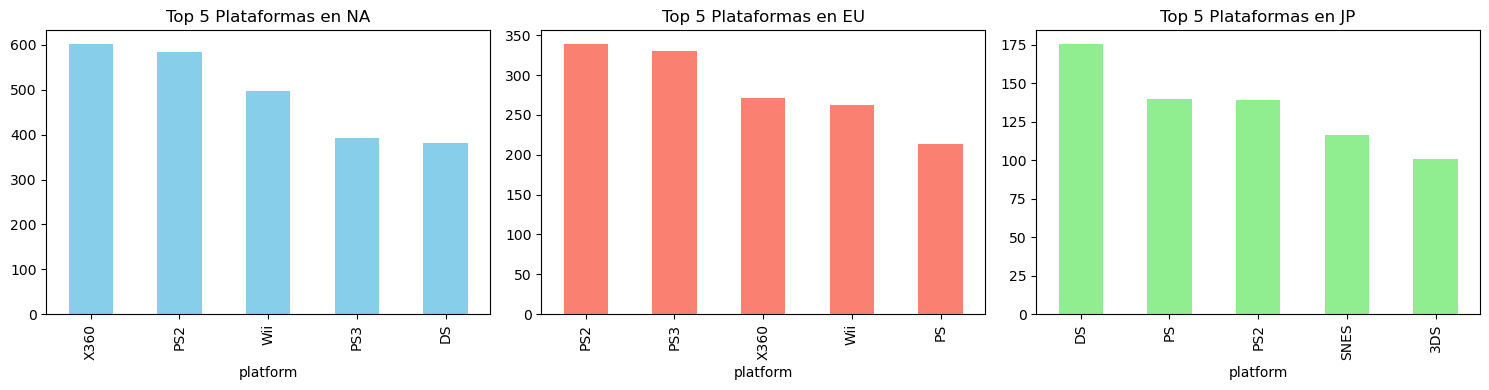

In [49]:
# determinar las cincos plataformas principaler por regiones

top_platforms_na = data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = data.groupby('platform')['jp_sales'].sum().nlargest(5)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Plataformas en NA')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar', color='salmon')
plt.title('Top 5 Plataformas en EU')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Plataformas en JP')

plt.tight_layout()
plt.show()

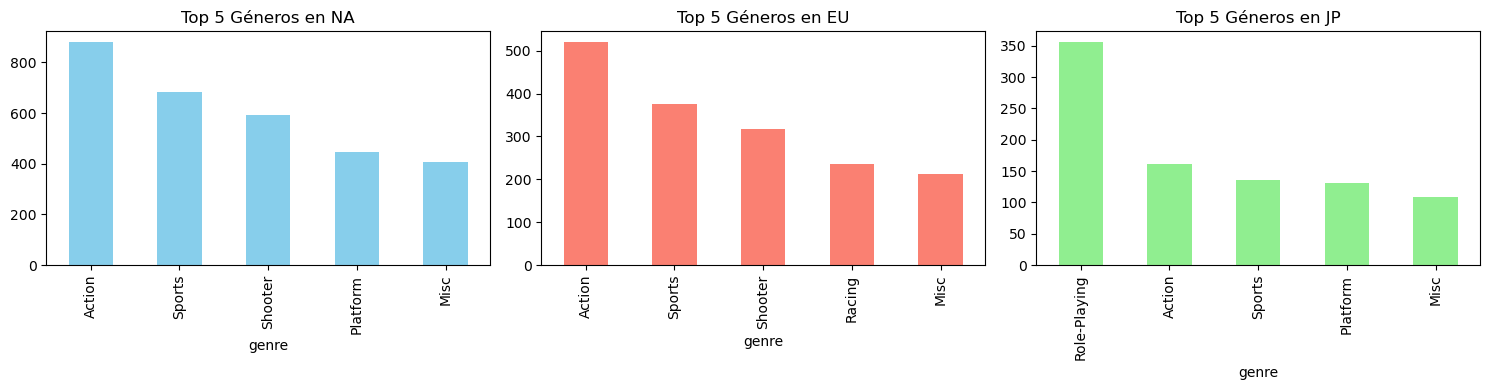

In [50]:
# determinar los cincos generos principales por regiones

top_genres_na = data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = data.groupby('genre')['jp_sales'].sum().nlargest(5)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros en NA')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar', color='salmon')
plt.title('Top 5 Géneros en EU')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Géneros en JP')

plt.tight_layout()
plt.show()

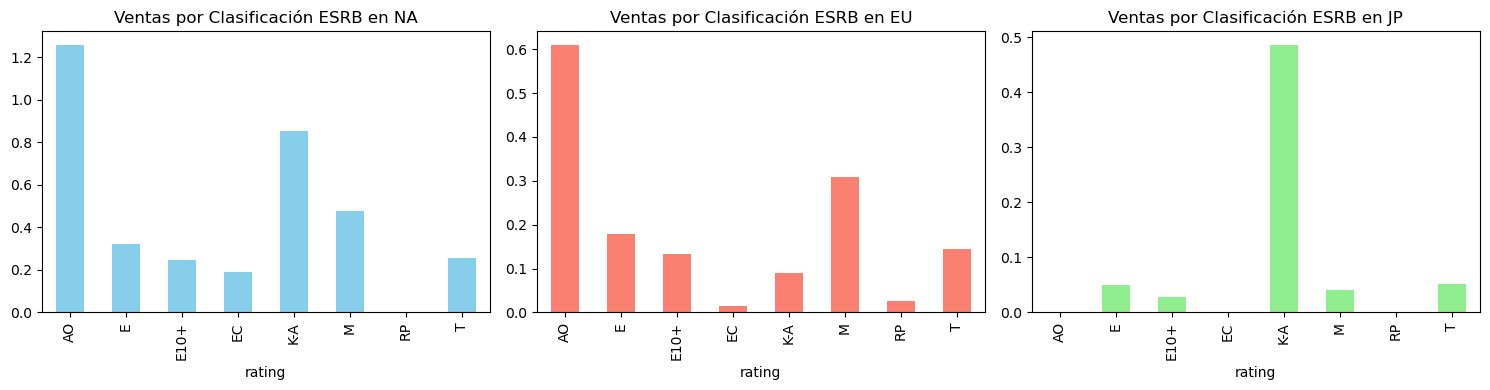

In [51]:
# agrupar por clasificación ESRB y calcular las ventas promedio en cada región

sales_by_esrb_na = data.groupby('rating')['na_sales'].mean()
sales_by_esrb_eu = data.groupby('rating')['eu_sales'].mean()
sales_by_esrb_jp = data.groupby('rating')['jp_sales'].mean()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sales_by_esrb_na.plot(kind='bar', color='skyblue')
plt.title('Ventas por Clasificación ESRB en NA')

plt.subplot(1, 3, 2)
sales_by_esrb_eu.plot(kind='bar', color='salmon')
plt.title('Ventas por Clasificación ESRB en EU')

plt.subplot(1, 3, 3)
sales_by_esrb_jp.plot(kind='bar', color='lightgreen')
plt.title('Ventas por Clasificación ESRB en JP')

plt.tight_layout()
plt.show()

__Evaluación:__

Es interesante observar cómo las __tendencias de ventas__ de videojuegos varían significativamente entre las diferentes regiones. Aunque hay algunas similitudes entre América del Norte y Europa, Japón presenta un panorama muy diferente en términos de __preferencias de juegos y plataformas__. Esto puede deberse a una combinación de factores, incluyendo __diferencias culturales__, __preferencias de género__ y el __éxito de ciertas franquicias__ o tipos de juegos en cada región.

## Relación entre la punctuacion de los juegos y las ventas

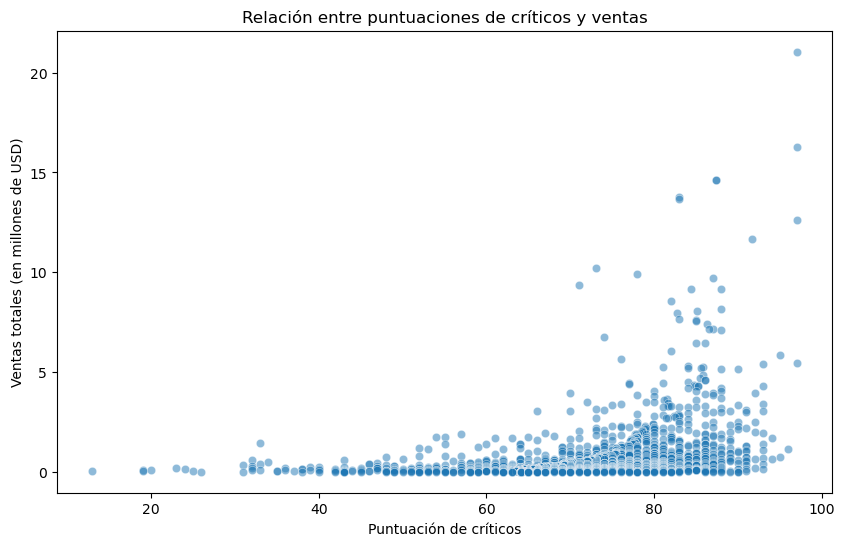

In [52]:
# trazar un gráfico de dispersión para mostrar la relación entre puntuaciones y ventas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_for_model, alpha=0.5)
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (en millones de USD)')
plt.title('Relación entre puntuaciones de críticos y ventas')
plt.show()

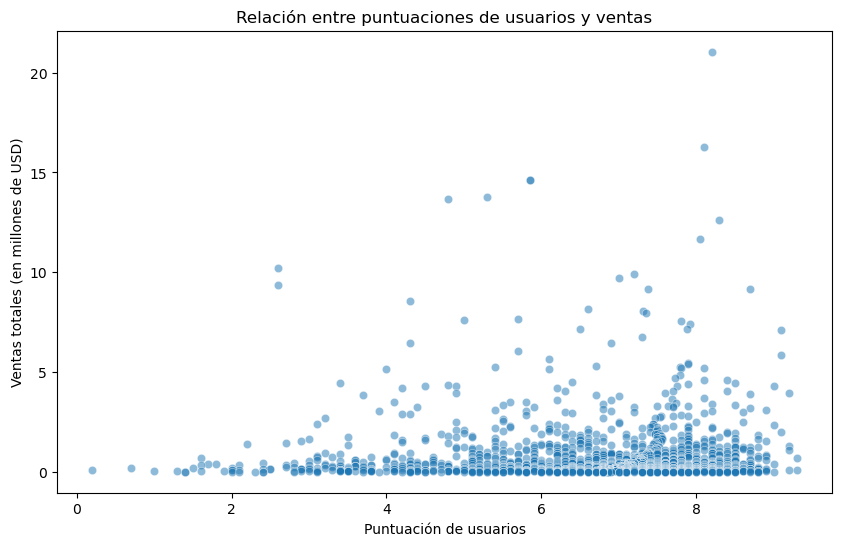

In [53]:
# trazar un gráfico de dispersión para mostrar la relación entre puntuaciones y ventas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=data_for_model, alpha=0.5)
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (en millones de USD)')
plt.title('Relación entre puntuaciones de usuarios y ventas')
plt.show()

In [54]:
# examinar la correlación entre las reseñas de usuarios y críticos y las ventas en una plataforma popular

platform = 'PS4'
platform_data = data_for_model[data_for_model['platform'] == platform].copy()

platform_data['user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')
platform_data = platform_data.dropna(subset=['critic_score', 'user_score'])

correlation_critic_sales = platform_data['critic_score'].corr(platform_data['total_sales'])
correlation_user_sales = platform_data['user_score'].corr(platform_data['total_sales'])

print(f'Correlación entre reseñas de críticos y ventas: {correlation_critic_sales}')
print(f'Correlación entre reseñas de usuarios y ventas: {correlation_user_sales}')

Correlación entre reseñas de críticos y ventas: 0.456057969584101
Correlación entre reseñas de usuarios y ventas: -0.037395341523989524


__Evaluación:__

 - La correlación entre las __reseñas de críticos__ y __las ventas__ es de aproximadamente __0.40__
 - Lo que indica una __correlación moderada positiva__
 - Por otro lado, la correlación entre las __reseñas de usuarios__ y __las ventas__ es muy __cercana a cero__
 - Lo que sugiere una __correlación muy débil__

# Prueba de hipótesis

- Vamos a generar una version del DataFrame original __sin valores ausentes__
- Averigüamos si el __tamaño de la muestra__ es suficiente para __probar las hípotesis__
- De esta forma podremos probar las hípotesis __sin manipular los datos originales__

In [55]:
# crear un filtrado sin valores ausentes

data_sample = data.dropna()

In [56]:
# imprimir las informaciones sobre el DataFrame actualizado

data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7968 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7968 non-null   object 
 1   platform         7968 non-null   object 
 2   year_of_release  7968 non-null   float64
 3   genre            7968 non-null   object 
 4   na_sales         7968 non-null   float64
 5   eu_sales         7968 non-null   float64
 6   jp_sales         7968 non-null   float64
 7   other_sales      7968 non-null   float64
 8   critic_score     7968 non-null   float64
 9   user_score       7968 non-null   object 
 10  rating           7968 non-null   object 
 11  total_sales      7968 non-null   float64
dtypes: float64(7), object(5)
memory usage: 809.2+ KB


In [57]:
# averiguar si los valores en la muestra son suficientes para probar las hípotesis

data_sample['platform'].value_counts()

PS2     1288
X360     898
PS3      806
XB       716
DS       707
PC       666
Wii      576
PSP      461
GC       446
GBA      428
PS4      241
PS       185
3DS      166
XOne     161
PSV      119
WiiU      90
DC        14
Name: platform, dtype: int64

In [58]:
# averiguar si los valores en la muestra son suficientes para probar las hípotesis

data_sample['genre'].value_counts()

Action          1859
Sports          1172
Shooter          931
Role-Playing     729
Racing           721
Misc             511
Platform         490
Fighting         406
Simulation       343
Adventure        299
Strategy         288
Puzzle           219
Name: genre, dtype: int64

In [59]:
# probar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

data_sample = data_sample[data_sample['user_score'] != 'tbd']

data_sample['user_score'] = data_sample['user_score'].astype(float)

xbox_one_scores = data_sample[data_sample['platform'] == 'XOne']['user_score']
pc_scores = data_sample[data_sample['platform'] == 'PC']['user_score']

t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

alfa = 0.05

if p_value < alfa:
    print("Las calificaciones promedio son diferentes")
else:
    print("Las calificaciones promedio son iguales")

Las calificaciones promedio son diferentes


In [60]:
# probar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

accion_scores = data_sample[data_sample['genre'] == 'Action']['user_score'].dropna().astype(float)
deportes_scores = data_sample[data_sample['genre'] == 'Sports']['user_score'].dropna().astype(float)

t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores)

alfa = 0.05

if p_value < alfa:
    print(f"Las calificaciones promedio son diferentes")
else:
    print(f"Las calificaciones promedio son iguales")

Las calificaciones promedio son iguales


__Evaluación:__

__Para la primera prueba (plataformas Xbox One y PC)__

 - __Rechazamos__ la hipótesis nula (H0)
 - Concluimos que las __calificaciones promedio__ de los usuarios para las plataformas Xbox One y PC __son diferentes__

__Para la segunda prueba (géneros de Acción y Deportes)__

 - __No rechazamos__ la hipótesis nula (H0)
 - __No hay suficiente evidencia__ para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


Estos resultados indican que, en base a los datos proporcionados, existe una __diferencia significativa__ en las __calificaciones promedio__ de los usuarios entre las plataformas Xbox One y PC. Sin embargo, __no se puede afirmar__ que exista una diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.

# Conclusiones

El objetivo de este análisis fue examinar las __tendencias y patrones__ en las ventas de videojuegos a lo largo del tiempo y en diferentes regiones geográficas. Para este propósito, se utilizó un conjunto de datos que contiene información detallada sobre los videojuegos, incluyendo su _plataforma_, _género_, _calificaciones_ y _ventas_ en _distintas regiones_.

__Tendencias de Ventas Globales:__

A lo largo de las décadas, el mercado de videojuegos experimentó un __crecimiento significativo__, alcanzando su punto máximo en años recientes. Sin embargo, es importante destacar que a partir del año 2008, se observó una __disminución notable en las ventas__, lo que indica un cambio en las dinámicas del mercado.

Se observa una marcada __diferencia en las tendencias de ventas entre regiones__, siendo Norteamérica y Europa las de mayor similitud, mientras que Japón presenta un perfil de mercado único y distintivo.

__Impacto de Plataformas:__

Las plataformas más exitosas tienen una __duración de vida mayor__, indicando que el éxito de una plataforma puede tener un __efecto significativo en las ventas de los juegos__.


__Juegos Multiplataforma:__

Algunos juegos tienen presencia en __múltiples plataformas__, lo que puede resultar en un aumento en las ventas totales. Sin embargo, es importante tener en cuenta que el éxito de un juego multiplataforma puede variar entre las distintas plataformas.


__Géneros Populares:__

Se identificaron los __géneros de videojuegos que dominan el mercado__, lo que sugiere que los consumidores tienen preferencias específicas en cuanto a géneros.


__Clasificaciones ESRB:__

Se observó una ligera correlación entre las clasificaciones de ESRB y las ventas en regiones individuales. Estos  factores pueden influir en las decisiones de compra de los consumidores a según de su cultura.


__Recomendaciones:__

Dado el __dinamismo del mercado__ de videojuegos y las __diferencias regionales significativas__, se recomienda a los desarrolladores y distribuidores considerar estrategias de marketing y desarrollo __adaptadas__ a las preferencias y tendencias específicas de cada región.